<a href="https://colab.research.google.com/github/Muhammad-Roshaan-Idrees/Artificial_Intelligence/blob/main/Diabeties_Prediction_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [2]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# Data Exploration and Preprocessing
print("\nData Exploration")
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nStatistical summary:")
print(df.describe())

# Check for zeros
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nNumber of zeros in each column (Before):")
for col in zero_cols:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros ({zero_count/len(df)*100:.2f}%)")

# Replace zeros with NaN and then with column mean
for col in zero_cols:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].mean(), inplace=True)

# Verify zeros
print("\nAfter handling zeros:")
for col in zero_cols:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros")


Data Exploration
Dataset shape: (768, 9)

Data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Statistical summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32

/tmp/ipython-input-2525618331.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


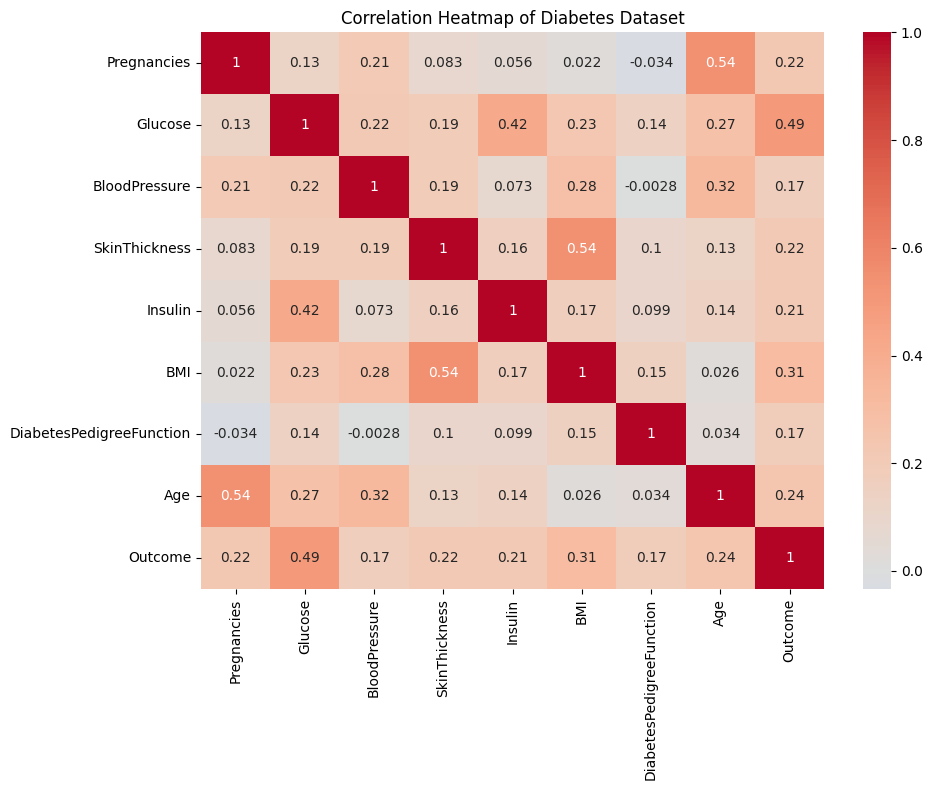

In [5]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.tight_layout()
plt.show()

In [6]:
# Split data into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"\nTraining set shape: {X_train}")
print(f"Test set shape: {X_test}")


Training set shape: [[-0.52639686 -1.25828206  0.01321033 ...  0.01501323 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.32735374  0.8068672  ... -0.59935041  2.41502991
   1.48710085]
 [-0.82846011  0.57032714 -2.17095414 ... -0.52719904  0.54916055
  -0.94893896]
 ...
 [ 1.8901091  -0.69307558  1.13773624 ...  1.91151712  1.981245
   0.44308379]
 [-1.13052335  0.63682202  0.01321033 ...  1.44974838 -0.78487662
  -0.33992901]
 [-1.13052335  0.10486298  1.96490883 ... -1.42187598 -0.61552223
  -1.03594038]]
Test set shape: [[ 0.68185612 -0.7928179  -1.17834702 ...  0.23760544 -0.11637247
   0.87809089]
 [-0.52639686 -0.32735374  0.22784639 ...  0.48292008 -0.954231
  -1.03594038]
 [-0.52639686 -0.4603435  -0.68204347 ... -0.22416331 -0.9245197
  -1.03594038]
 ...
 [ 1.28598261 -0.89256022 -0.02030539 ...  0.64165309  0.04703966
   2.0961108 ]
 [-0.52639686  0.80305922 -0.18573991 ... -0.62821095 -0.39268751
  -0.33992901]
 [ 1.28598261 -1.59075646 -0.18573991 ...  0.42519899  0.70068816


In [7]:
# Building the Neural Network Model
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model architecture
print("\nModel Architecture")
model.summary()


Model Architecture


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Stop training early if validation stops improving
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training and Evaluation
print("\nTraining the Model")
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10)



Training the Model
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4931 - loss: 0.7381 - val_accuracy: 0.6911 - val_loss: 0.6201
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6539 - loss: 0.6259 - val_accuracy: 0.7154 - val_loss: 0.5725
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6563 - loss: 0.6428 - val_accuracy: 0.7398 - val_loss: 0.5348
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6906 - loss: 0.5607 - val_accuracy: 0.7398 - val_loss: 0.5025
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7213 - loss: 0.5437 - val_accuracy: 0.7398 - val_loss: 0.4770
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7046 - loss: 0.5556 - val_accuracy: 0.7561 - val_loss: 0.4688
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7158 - loss: 0.5258 - val_accuracy: 0.7480 - val_loss: 0.4612
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7505 - loss: 0.4918 - val_

In [9]:
# Building the Neural Network Model
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model architecture
print("\nModel Architecture")
model.summary()


Model Architecture


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

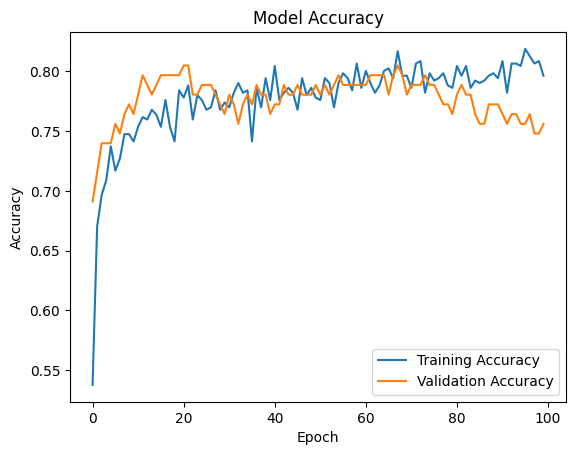

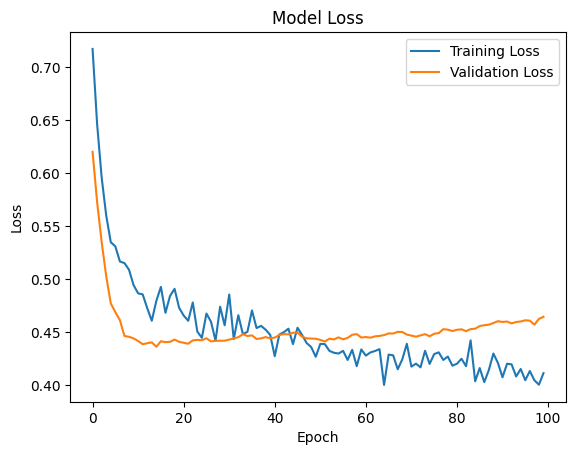

In [10]:
# Accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [11]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate model performance
print("\nModel Evaluation")
acc = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {acc}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n {conf_matrix}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n {class_report}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Model Evaluation
Test Accuracy: 0.3181818181818182
Confusion Matrix:
 [[18 81]
 [24 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.18      0.26        99
           1       0.28      0.56      0.37        55

    accuracy                           0.32       154
   macro avg       0.35      0.37      0.31       154
weighted avg       0.37      0.32      0.30       154

